Equivalent circuit of a transmission line
===

Many sites on the Internet show the lumped equivalent circuit of a $\lambda / 4$ transmission line, but I have never found out there the design equations for a transmission line of any length. I derived them here for future reference<br/>

The idea is to compare the ABCD matrix of a transmission line with the ABCD matrix of a $\pi$-type network and then obtain a close form for designing the equivalent circuit

### ABCD matrix of an arbitrary-length transmission line

In [104]:
from sage.misc.latex import MathJax
mj = MathJax()
j=i
var('Z0', 'lambda_', 'L', 'gamma', 'beta', 'omega_0')
ABCD_TL = matrix([[cosh(gamma*L),Z0*sinh(gamma*L)],[(1/Z0)*sinh(gamma*L),cosh(gamma*L)]])
html('$A_{TL}$ = ' +mj(ABCD_TL))

<script type="math/tex">A_{TL}</script> = <html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}\left(\begin{array}{rr}
\cosh\left(L \gamma\right) & Z_{0} \sinh\left(L \gamma\right) \\
\frac{\sinh\left(L \gamma\right)}{Z_{0}} & \cosh\left(L \gamma\right)
\end{array}\right)</script></html>

### ABCD matrix of a pi-type network

The ABCD matrix of a $\pi$-type network can be calculated by cascading the ABCD matrix of 1st shunt, series and 2nd shunt elements

In [105]:
var('Z_sh1', 'Z_ser', 'Z_sh2')
ABCD_Shunt1 = matrix([[1,0],[1/Z_sh1,1]])
ABCD_Series = matrix([[1,Z_ser],[0,1]])
ABCD_Shunt2 = matrix([[1,0],[1/Z_sh2,1]])
ABCD_pi = ABCD_Shunt1*ABCD_Series*ABCD_Shunt2;
html('$A_{\pi}$ = ' + mj(ABCD_pi))

<script type="math/tex">A_{\pi}</script> = <html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}\left(\begin{array}{rr}
\frac{Z_{\mathit{ser}}}{Z_{\mathit{sh}_{2}}} + 1 & Z_{\mathit{ser}} \\
\frac{\frac{Z_{\mathit{ser}}}{Z_{\mathit{sh}_{1}}} + 1}{Z_{\mathit{sh}_{2}}} + \frac{1}{Z_{\mathit{sh}_{1}}} & \frac{Z_{\mathit{ser}}}{Z_{\mathit{sh}_{1}}} + 1
\end{array}\right)</script></html>

In [106]:
var('Z_series_1_T', 'Z_shunt_T', 'Z_series_2_T')
ABCD_Series_1_T = matrix([[1,Z_series_1_T],[0,1]])
ABCD_Shunt_T = matrix([[1,0],[1/Z_shunt_T,1]])
ABCD_Series_2_T = matrix([[1,Z_series_2_T],[0,1]])

ABCD_T = ABCD_Series_1_T*ABCD_Shunt_T*ABCD_Series_2_T;
html('$A_{T}$ = ' + mj(ABCD_T))

<script type="math/tex">A_{T}</script> = <html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}\left(\begin{array}{rr}
\frac{Z_{\mathit{series}_{1_{T}}}}{Z_{\mathit{shunt}_{T}}} + 1 & Z_{\mathit{series}_{2_{T}}} {\left(\frac{Z_{\mathit{series}_{1_{T}}}}{Z_{\mathit{shunt}_{T}}} + 1\right)} + Z_{\mathit{series}_{1_{T}}} \\
\frac{1}{Z_{\mathit{shunt}_{T}}} & \frac{Z_{\mathit{series}_{2_{T}}}}{Z_{\mathit{shunt}_{T}}} + 1
\end{array}\right)</script></html>

$\pi$-type equivalent
===

By comparison of $A_{\pi}$ and $A_{TL}$, we get the following equations, where we assume that the line is lossless:<br/>

Eq. 1) $\frac{Z_{series}^{\pi}}{Z_{shunt2}^{\pi}} + 1 = cosh(\gamma \cdot L) = cos(\beta \cdot L)$ <br/>

Eq. 2) $Z_{series}^{\pi} = Z_0\cdot sinh(\gamma \cdot L) = j \cdot Z_0 \cdot sin(\beta \cdot L)$ <br/>

Eq. 3) $\frac{\frac{Z_{series}^\pi}{Z_{shunt1}^\pi} + 1}{Z_{shunt2}^{\pi}} + \frac{1}{Z_{shunt1}^{\pi}} = \frac{sinh(\gamma \cdot L)} {Z_0} = \frac{j \cdot sin(\beta \cdot L)}{Z_0}$ <br/>

Eq. 4) $\frac{Z_{series}^\pi}{Z_{shunt1}^\pi} + 1 = cosh(\gamma \cdot L)  = cos(\beta \cdot L)$ <br/>


Since the line is supposed to be lossless, $\gamma = \alpha + j \cdot \beta = j \cdot \beta$ <br/>

Consequently,

$sinh(\gamma \cdot L) = sinh(j \cdot \beta \cdot L) = j \cdot sin(\beta \cdot L)$ and <br/>
$cosh(\gamma \cdot L) = cosh(j \cdot \beta \cdot L) = cos(\beta \cdot L)$ <br/>

$Z_{series}$ is given by Eq. 2). At the light of equations 1 and 4, $Z_{shunt1} = Z_{shunt2} = \frac{Z_{series}}{cos(\beta \cdot L) - 1}$ <br/>

These results must satisfy equation #3. Let's see if that's true:



In [107]:
var('Z_ser', 'Z_sh1', 'Z_sh2', 'L', 'Z0', 'beta')

Z_ser = j*Z0*sin(beta*L)
Z_sh1 = Z_ser/(cos(beta*L)-1)
Z_sh2 = Z_sh1;

eq_3 = (Z_ser/Z_sh1 + 1) / Z_sh2 + 1/Z_sh1
html(mj(eq_3.simplify_full()))


<html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}\frac{i \, \sin\left(L \beta\right)}{Z_{0}}</script></html>

so, that's true and therefore, we can state that

In [108]:
html('$Z_{series}^{\pi}$' + mj(Z_ser) + '$Z_{shunt}^{\pi}$' + mj(Z_sh2))

<script type="math/tex">Z_{series}^{\pi}</script><html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}i \, Z_{0} \sin\left(L \beta\right)</script></html><script type="math/tex">Z_{shunt}^{\pi}</script><html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}\frac{i \, Z_{0} \sin\left(L \beta\right)}{\cos\left(L \beta\right) - 1}</script></html>

T-type equivalent
===

Let's repeat the process with the ABCD matrix of the T-type equivalent.
By comparing $A_{T}$ and $A_{TL}$, we get the following equations, where again, we assume that the line is lossless:<br/>

Eq. 1) $\frac{Z_{series1}^{T}}{Z_{shunt}^{T}} + 1 = cosh(\gamma \cdot L) = cos(\beta \cdot L)$ <br/>

Eq. 2) $Z_{series2}^{T} \cdot \left(  \frac{Z_{series1}^T}{Z_{shunt}^T} + 1\right) + Z_{series1} = Z_0\cdot sinh(\gamma \cdot L) = j \cdot Z_0 \cdot sin(\beta \cdot L)$ <br/>

Eq. 3) $\frac{1}{Z_{shunt}^T}= \frac{sinh(\gamma \cdot L)} {Z_0} = \frac{j \cdot sin(\beta \cdot L)}{Z_0}$ <br/>

Eq. 4) $\frac{Z_{series2}^T}{Z_{shunt}^T} + 1 = cosh(\gamma \cdot L)  = cos(\beta \cdot L)$ <br/>


Since the line is supposed to be lossless, $\gamma = \alpha + j \cdot \beta = j \cdot \beta$ <br/>

Consequently,

$sinh(\gamma \cdot L) = sinh(j \cdot \beta \cdot L) = j \cdot sin(\beta \cdot L)$ and <br/>
$cosh(\gamma \cdot L) = cosh(j \cdot \beta \cdot L) = cos(\beta \cdot L)$ <br/>

$Z_{shunt}^T  = -j \cdot \frac{Z_0}{sin(\beta \cdot L)} $ is given by Eq. 3). At the light of equations 1 and 4, $Z_{series1} = Z_{series2} = Z_{shunt}^T \cdot (cos(\beta \cdot L) - 1)$ <br/>

These results must satisfy equation #2. Let's see if that's true:

In [109]:
var('Z_ser1', 'Z_ser2', 'Z_sh', 'L', 'Z0', 'beta')

Z_sh = -j*Z0/sin(beta*L)
Z_ser1 = Z_sh*(cos(beta*L) - 1)
Z_ser2 = Z_ser1;

eq_2 = Z_ser2*(1 + Z_ser1/Z_sh) + Z_ser1
html(mj(eq_2.simplify_full()))


<html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}i \, Z_{0} \sin\left(L \beta\right)</script></html>

that's true too, so:

In [110]:
html('$Z_{series}^{T}$' + mj(Z_ser1) + '$Z_{shunt}^{T}$' + mj(Z_sh))

<script type="math/tex">Z_{series}^{T}</script><html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}-\frac{i \, Z_{0} {\left(\cos\left(L \beta\right) - 1\right)}}{\sin\left(L \beta\right)}</script></html><script type="math/tex">Z_{shunt}^{T}</script><html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}-\frac{i \, Z_{0}}{\sin\left(L \beta\right)}</script></html>

The above expressions may take either positive or negative values depending on the $\beta \cdot L$ product. Notice that the sign changes at $L = \lambda / 2$, so the capacitors become inductors and vice-versa. <br/>
Since the graph below is symmetric about $\lambda/2$ and $L = L + \lambda / 2$ we can obtain lowpass and highpass equivalent circuits for any transmission line.

Reactances for the $\pi$-type network
===

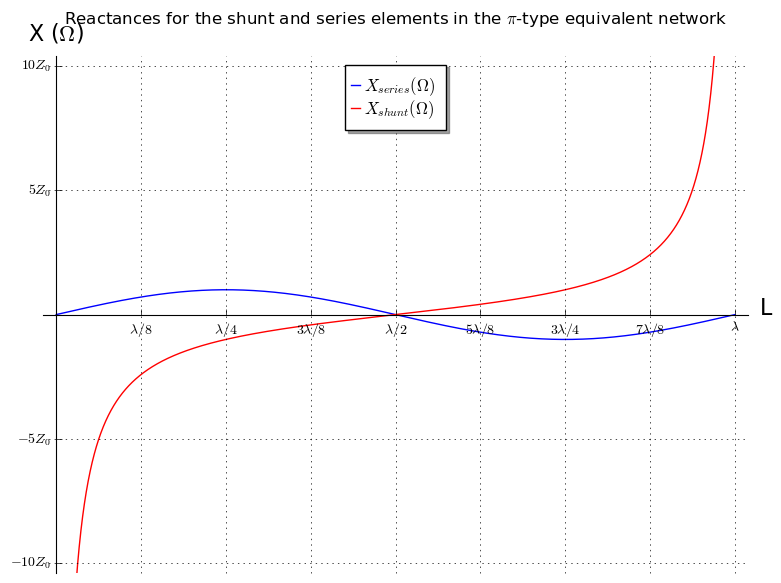

In [111]:
f0 = 1e9;
c0 = 299792458;
lambda_ = c0/f0;
beta_ =2*pi/lambda_;
Xser(L, beta) = sin(beta*L);
Xsh1(L, beta) = (sin(beta*L))/(cos(beta*L)-1);

xt = [lambda_/8, lambda_/4, 3*lambda_/8, lambda_/2, 5*lambda_/8, 3*lambda_/4, 7*lambda_/8, lambda_];
xt_lbl = ['$\lambda/8$', '$\lambda/4$', '$3\lambda/8$','$\lambda/2$', '$5\lambda/8$', '$3\lambda/4$', '$7\lambda/8$', '$\lambda$']

yt = [-10, -5, 0, 5, 10];
yt_lbl = ['$-10Z_0$', '$-5Z_0$', '$0$', '$5Z_0$', '$10Z_0$']

Xseries_plot = plot(Xser(L=L, beta=beta_), (L, 0, lambda_), legend_label='$X_{series} (\Omega)$', ticks=[xt, yt],tick_formatter=[xt_lbl, yt_lbl]);
Xshunt_plot = plot(Xsh1(L=L, beta=beta_), (L, 0, lambda_), color='red', legend_label='$X_{shunt} (\Omega)$',axes_labels=["L","X ($\Omega$)"]);
Xshunt_plot.set_legend_options(loc='upper center')
show(Xseries_plot + Xshunt_plot, figsize=8, ymin = -10, ymax=10, gridlines=true, title='Reactances for the shunt and series elements in the $\pi$-type equivalent network')

Lowpass $\pi$-type equivalent
---

if $L < \lambda/2$, the equivalent network has a lowpass response:

$\mathbb{I}\lbrace Z_{series}\rbrace>0 \Longrightarrow Z_{series}$ is an inductor.

$\mathbb{I}\lbrace Z_{shunt}\rbrace<0 \Longrightarrow Z_{shunt}$ is capacitor.


In [112]:
reset()
from sage.misc.latex import MathJax
mj = MathJax()
j=i

var('Z0', 'beta', 'L', 'omega_0')
 
Z_series_pi = j*Z0*sin(beta*L)
Z_shunt_pi = Z_series_pi/(cos(beta*L)-1)

L = Z_series_pi/(j*omega_0);
C = 1/(j*Z_shunt_pi*omega_0);
html("Lowpass $\pi$<br/>" +"$L_{series}^\pi$ ="  + mj(L)+ "$C_{shunt}^\pi$ ="+ mj(C))

Lowpass <script type="math/tex">\pi</script><br/><script type="math/tex">L_{series}^\pi</script> =<html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}\frac{Z_{0} \sin\left(L \beta\right)}{\omega_{0}}</script></html><script type="math/tex">C_{shunt}^\pi</script> =<html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}-\frac{\cos\left(L \beta\right) - 1}{Z_{0} \omega_{0} \sin\left(L \beta\right)}</script></html>

Highpass $\pi$-type equivalent
---

if $L > \lambda/2$, the equivalent network has a highpass response:

$\mathbb{I}\lbrace Z_{series}\rbrace<0 \Longrightarrow Z_{series}$ is a capacitor.

$\mathbb{I}\lbrace Z_{shunt}\rbrace>0 \Longrightarrow Z_{shunt}$ is an inductor.


In [113]:
# For the highpass equivalent, we have to add lambda/2 to the actual length
var('L', 'lambda_', 'Z_0', 'omega_0')
j = i;
beta = 2*pi/lambda_
gamma = -j*beta;
length = L + lambda_/2

Z_series = Z_0*sinh(gamma*length);
Z_shunt = Z_series/(cosh(gamma*length) - 1) #Both shunt impedances are equal


C = -1/(j*omega_0*Z_series);
L = -Z_shunt/(j*omega_0);
html("Highpass $\pi$<br/>" + "$C_{series}^\pi$ ="  + mj(C.factor())+ "$L_{shunt}^\pi$ ="+ mj(L.factor()))

Highpass <script type="math/tex">\pi</script><br/><script type="math/tex">C_{series}^\pi</script> =<html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}\frac{1}{Z_{0} \omega_{0} \sin\left(\frac{2 \, \pi L}{\lambda}\right)}</script></html><script type="math/tex">L_{shunt}^\pi</script> =<html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}\frac{Z_{0} \sin\left(\frac{2 \, \pi L}{\lambda}\right)}{\omega_{0} {\left(\cos\left(\frac{2 \, \pi L}{\lambda}\right) + 1\right)}}</script></html>

Reactances for the T-type network
===

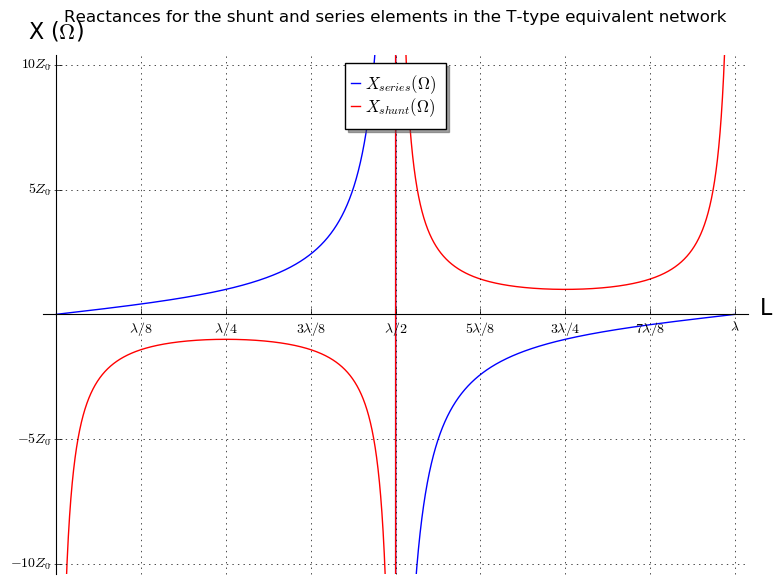

In [114]:
f0 = 1e9;
c0 = 299792458;
lambda_ = c0/f0;
beta_ =2*pi/lambda_;
Xseries(L, beta) = -(cos(beta*L) - 1)/sin(beta*L);
Xshunt(L, beta) = -1/sin(beta*L);

xt = [lambda_/8, lambda_/4, 3*lambda_/8, lambda_/2, 5*lambda_/8, 3*lambda_/4, 7*lambda_/8, lambda_];
xt_lbl = ['$\lambda/8$', '$\lambda/4$', '$3\lambda/8$','$\lambda/2$', '$5\lambda/8$', '$3\lambda/4$', '$7\lambda/8$', '$\lambda$']

yt = [-10, -5, 0, 5, 10];
yt_lbl = ['$-10Z_0$', '$-5Z_0$', '$0$', '$5Z_0$', '$10Z_0$']

Xseries_plot = plot(Xseries(L=L, beta=beta_), (L, 0, lambda_), legend_label='$X_{series} (\Omega)$', ticks=[xt, yt],tick_formatter=[xt_lbl, yt_lbl]);
Xshunt_plot = plot(Xshunt(L=L, beta=beta_), (L, 0, lambda_), color='red', legend_label='$X_{shunt} (\Omega)$',axes_labels=["L","X ($\Omega$)"]);
Xshunt_plot.set_legend_options(loc='upper center')
show(Xseries_plot + Xshunt_plot, figsize=8, ymin = -10, ymax=10, gridlines=true, title='Reactances for the shunt and series elements in the T-type equivalent network')

Lowpass T-type equivalent
---

if $L < \lambda/2$, the equivalent network has a lowpass response:

$\mathbb{I}\lbrace Z_{series}\rbrace>0 \Longrightarrow Z_{series}$ is an inductor.

$\mathbb{I}\lbrace Z_{shunt}\rbrace<0 \Longrightarrow Z_{shunt}$ is capacitor.

In [115]:
reset()
from sage.misc.latex import MathJax
mj = MathJax()
j=i

var('Z0', 'L', 'beta', 'omega_0')

Z_shunt_T = -j*Z0/sin(beta*L)
Z_series1_T = Z_shunt_T*(cos(beta*L) - 1)

L = Z_series1_T/(j*omega_0);
C = 1/(j*Z_shunt_T*omega_0);
html("Lowpass T<br/>" +"$L_{series}^T$ ="  + mj(L)+ "$C_{shunt}^T$ ="+ mj(C))

Lowpass T<br/><script type="math/tex">L_{series}^T</script> =<html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}-\frac{Z_{0} {\left(\cos\left(L \beta\right) - 1\right)}}{\omega_{0} \sin\left(L \beta\right)}</script></html><script type="math/tex">C_{shunt}^T</script> =<html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}\frac{\sin\left(L \beta\right)}{Z_{0} \omega_{0}}</script></html>

Highpass T-type equivalent
---

if $L > \lambda/2$, the equivalent network has a highpass response:

$\mathbb{I}\lbrace Z_{series}\rbrace<0 \Longrightarrow Z_{series}$ is a capacitor.

$\mathbb{I}\lbrace Z_{shunt}\rbrace>0 \Longrightarrow Z_{shunt}$ is an inductor.


In [116]:
# For the highpass equivalent, we have to add lambda/2 to the actual length
var('L', 'lambda_', 'Z_0', 'omega_0')
j = i;
beta = 2*pi/lambda_
gamma = -j*beta;
length = L + lambda_/2

Z_series = -j*Z0*(cos(beta*L) - 1)/sin(beta*L)
Z_shunt = -j*Z0/sin(beta*L)


C = 1/(j*omega_0*Z_series);
L = Z_shunt/(j*omega_0);
html("Highpass T<br/>" + "$C_{series}^T$ ="  + mj(C.factor())+ "$L_{shunt}^T$ ="+ mj(L.factor()))

Highpass T<br/><script type="math/tex">C_{series}^T</script> =<html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}\frac{\sin\left(\frac{2 \, \pi L}{\lambda}\right)}{Z_{0} \omega_{0} {\left(\cos\left(\frac{2 \, \pi L}{\lambda}\right) - 1\right)}}</script></html><script type="math/tex">L_{shunt}^T</script> =<html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}-\frac{Z_{0}}{\omega_{0} \sin\left(\frac{2 \, \pi L}{\lambda}\right)}</script></html>

Special case: $\lambda / 4$ transmission line
---

The $\pi$-type equivalent of the $\lambda/4$ line is well known, so let's check the results above for L = $\lambda / 4$.

Lowpass equivalent network of the $\lambda / 4$ transmission line

In [117]:
#Lossless => alpha = 0
var('omega_0')
beta = 2*pi/lambda_
gamma = j*beta
L = lambda_/4;
#We need to evaluate again the above expression to update the definition of gamma
Z_ser = Z0*sinh(gamma*L);
Z_sh2 = Z_ser/(cosh(gamma*L) - 1)
Z_sh1 = Z_sh2
html('Z<sub>series</sub> = '+ mj(Z_ser.factor()) + 'Z<sub>shunt</sub>' + mj(Z_sh2.factor()) + 
'Consequently:<br/>' +
'L<sub>series</sub> = '+ mj(Z_ser.factor()/(j*omega_0)) + 'C<sub>shunt</sub>' + mj(1/(j*omega_0*Z_sh2.factor())))

Z<sub>series</sub> = <html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}i \, Z_{0}</script></html>Z<sub>shunt</sub><html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}-i \, Z_{0}</script></html>Consequently:<br/>L<sub>series</sub> = <html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}\frac{Z_{0}}{\omega_{0}}</script></html>C<sub>shunt</sub><html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}\frac{1}{Z_{0} \omega_{0}}</script></html>

Highpass equivalent network of the $\lambda / 4$ transmission line

In [118]:
#Lossless => alpha = 0
beta = 2*pi/lambda_
gamma = j*beta
L = 3*lambda_/4;# lambda/4 = lambda/4 + lambda/2 = 3*lambda/4
#We need to evaluate again the above expression to update the definition of gamma
Z_ser = Z0*sinh(gamma*L);
Z_sh2 = Z_ser/(cosh(gamma*L) - 1)
Z_sh1 = Z_sh2
html('Z<sub>series</sub> = '+ mj(Z_ser.factor()) + 'Z<sub>shunt</sub>' + mj(Z_sh2.factor()) + 
'Consequently:<br/>' +
'C<sub>series</sub> = '+  mj(1/(j*omega_0*Z_ser.factor())) + 'L<sub>shunt</sub>' + mj(Z_sh1.factor()/(j*omega_0)))

Z<sub>series</sub> = <html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}-i \, Z_{0}</script></html>Z<sub>shunt</sub><html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}i \, Z_{0}</script></html>Consequently:<br/>C<sub>series</sub> = <html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}\frac{1}{Z_{0} \omega_{0}}</script></html>L<sub>shunt</sub><html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}\frac{Z_{0}}{\omega_{0}}</script></html>

Code
---

In [119]:
reset()
def TL_to_LumpedEquivalent(f0, Z0, length, response):
    c0 = 299792458;
    lambda_ = c0/f0;
    w0 = 2*pi*f0;
    beta  =2*pi/lambda_;
    
    if response == "lowpass": 
        if (length > lambda_/2): #Ensure length < lambda / 2
            length = length - lambda_/2;
        L_pi = Z0*sin(beta*length)/w0;
        C_pi = (1 - cos(beta*length))/(w0*Z0*sin(beta*length));
        
        L_T = (Z0*(1-cos(beta*length)))/(w0*sin(beta*length));
        C_T = sin(beta*length)/(Z0*w0);
        
        output = html("Lowpass equivalent network of a TL (Z<sub>0</sub> = " + str(Z0.n(digits=3)) + "$\Omega$, " +
                      "L = " + str(L.n(digits=3)) + " m) @ "+ str((f0*1e-6).n(digits=5)) + " MHz <br/>" +
                      "-------------------------------------------------------- <br/>" +
                      "$\pi$-type: <br/>" +
                      "C<sub>shunt</sub>: " + str(n(C_pi*1e12, digits=3)) + " pF<br/>" +
                      "L<sub>series</sub> = " + str(n(L_pi*1e9, digits=3)) + " nH<br/>"+
                      "C<sub>shunt</sub>: " + str(n(C_pi*1e12, digits=3)) + " pF<br/><br/>" +
                      "T-type: <br/>" +
                      "L<sub>series</sub> = " + str(n(L_T*1e9, digits=3)) + " nH<br/>"+
                      "C<sub>shunt</sub>: " + str(n(C_T*1e12, digits=3)) + " pF<br/>" +
                      "L<sub>series</sub> = " + str(n(L_T*1e9, digits=3)) + " nH<br/>"
                     );
        
    if response == "highpass": 
        if (length < lambda_/2): #Ensure length > lambda / 2
            length = length + lambda_/2;
        C_pi = -1/(w0*Z0*sin(beta*length));
        L_pi = Z0*sin(beta*length)/(w0*(cos(beta*length)-1));
        
        C_T = -(sin(beta*length))/(Z0*w0*(cos(beta*length)-1));
        L_T = Z0/(w0*sin(beta*length));
                
        output = html("Highpass equivalent network of a TL (Z<sub>0</sub> = " + str(Z0.n(digits=3)) + "$\Omega$, " +
                      "L = " + str(L.n(digits=3)) + " m) @ "+ str((f0*1e-6).n(digits=5)) + " MHz <br/>" +
                      "-------------------------------------------------------- <br/>" +
                      "$\pi$-type: <br/>" +
                      "L<sub>shunt</sub>: " + str(n(L_pi*1e9, digits=3)) + " nH<br/>" +
                      "C<sub>series</sub> = " + str(n(C_pi*1e12, digits=3)) + " pF<br/>"+
                      "L<sub>shunt</sub>: " + str(n(L_pi*1e9, digits=3)) + " nH<br/><br/>" +
                      "T-type: <br/>" +
                      "C<sub>series</sub> = " + str(n(C_T*1e12, digits=3)) + " pF<br/>"+
                      "L<sub>shunt</sub>: " + str(n(L_T*1e9, digits=3)) + " nH<br/>" +
                      "C<sub>series</sub> = " + str(n(C_T*1e12, digits=3)) + " pF<br/>"
                     );
    return output

Example
---

In [120]:
# Transmission line data
f0 = 1e9; # Hz
Z0 = 86.6;  # Ohm
c_0=299792458;
lambda_ = c_0/f0
L = 0.9*lambda_/4; # m

# Equivalent circuit type
response = "lowpass"

V = TL_to_LumpedEquivalent(f0=f0, Z0=Z0, length=L, response=response);
V


Lowpass equivalent network of a TL (Z<sub>0</sub> = 86.6<script type="math/tex">\Omega</script>, L = 0.0675 m) @ 1000.0 MHz <br/>-------------------------------------------------------- <br/><script type="math/tex">\pi</script>-type: <br/>C<sub>shunt</sub>: 1.57 pF<br/>L<sub>series</sub> = 13.6 nH<br/>C<sub>shunt</sub>: 1.57 pF<br/><br/>T-type: <br/>L<sub>series</sub> = 11.8 nH<br/>C<sub>shunt</sub>: 1.82 pF<br/>L<sub>series</sub> = 11.8 nH<br/>

In [121]:
# Equivalent circuit type
response = "highpass"

V = TL_to_LumpedEquivalent(f0=f0, Z0=Z0, length=L, response=response);
V


Highpass equivalent network of a TL (Z<sub>0</sub> = 86.6<script type="math/tex">\Omega</script>, L = 0.0675 m) @ 1000.0 MHz <br/>-------------------------------------------------------- <br/><script type="math/tex">\pi</script>-type: <br/>L<sub>shunt</sub>: 11.8 nH<br/>C<sub>series</sub> = 1.86 pF<br/>L<sub>shunt</sub>: 11.8 nH<br/><br/>T-type: <br/>C<sub>series</sub> = -1.57 pF<br/>L<sub>shunt</sub>: -14.0 nH<br/>C<sub>series</sub> = -1.57 pF<br/>

Frequency response
===

Lowpass $\pi$-type

In [122]:
reset()
from sage.misc.latex import MathJax
mj = MathJax()
j=i

var('Z0', 'beta', 'L', 'omega_0', 'omega')

L_pi_LP = Z0*sin(beta*L)/omega_0;
C_pi_LP = (1 - cos(beta*L))/(omega_0*Z0*sin(beta*L));


ZL_pi_LP = j*omega*L_pi_LP;
ZC_pi_LP = 1/(j*omega*C_pi_LP);

ABCD_C1_pi_LP = matrix([[1,0],[1/ZC_pi_LP,1]])
ABCD_L_pi_LP = matrix([[1,ZL_pi_LP],[0,1]])
ABCD_C2_pi_LP = matrix([[1,0],[1/ZC_pi_LP,1]])

ABCD_pi_LP = ABCD_C1_pi_LP*ABCD_L_pi_LP*ABCD_C2_pi_LP;

#Conversion ABCD to S
A = ABCD_pi_LP[0,0];
B = ABCD_pi_LP[0,1];
C = ABCD_pi_LP[1,0];
D = ABCD_pi_LP[1,1];

#S11_pi_LP = ((A + B/Z0 - C*Z0 - D)/(A + B/Z0 + C*Z0 + D)).simplify_full()
#S12_pi_LP = (2*(A*D - B*C)/(A + B/Z0 + C*Z0 + D)).simplify_full()
S21_pi_LP = (2/(A + B/Z0 + C*Z0 + D)).simplify_full()
#S22_pi_LP = ((-A + B/Z0 - C*Z0 + D)/(A + B/Z0 + C*Z0 + D)).simplify_full()

S21_pi_LP(omega_0, omega, beta, L) = 10*log(abs(S21_pi_LP), 10).simplify_full();

html('$A^{\pi}_{LP}$ = ' + mj(ABCD_pi_LP) + mj(S21_pi_LP))


<script type="math/tex">A^{\pi}_{LP}</script> = <html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}\left(\begin{array}{rr}
\frac{\omega^{2} {\left(\cos\left(L \beta\right) - 1\right)}}{\omega_{0}^{2}} + 1 & \frac{i \, Z_{0} \omega \sin\left(L \beta\right)}{\omega_{0}} \\
-\frac{i \, \omega {\left(\frac{\omega^{2} {\left(\cos\left(L \beta\right) - 1\right)}}{\omega_{0}^{2}} + 1\right)} {\left(\cos\left(L \beta\right) - 1\right)}}{Z_{0} \omega_{0} \sin\left(L \beta\right)} - \frac{i \, \omega {\left(\cos\left(L \beta\right) - 1\right)}}{Z_{0} \omega_{0} \sin\left(L \beta\right)} & \frac{\omega^{2} {\left(\cos\left(L \beta\right) - 1\right)}}{\omega_{0}^{2}} + 1
\end{array}\right)</script></html><html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}\left( \omega_{0}, \omega, \beta, L \right) \ {\mapsto} \ \frac{10 \, \log\left(\frac{2 \, {\left| \omega_{0} \right|}^{3} {\left| \sin\left(L \beta\right) \right|}}{{\left| 2 \, \omega^{2} \omega_{0} {\left(\cos\left(L \beta\right) - 1\right)} \sin\left(L \beta\right) + {\left(i \, \sin\left(L \beta\right)^{2} + 2 i \, \cos\left(L \beta\right) - 2 i\right)} \omega^{3} + {\left(i \, \sin\left(L \beta\right)^{2} - 2 i \, \cos\left(L \beta\right) + 2 i\right)} \omega \omega_{0}^{2} + 2 \, \omega_{0}^{3} \sin\left(L \beta\right) \right|}}\right)}{\log\left(10\right)}</script></html>

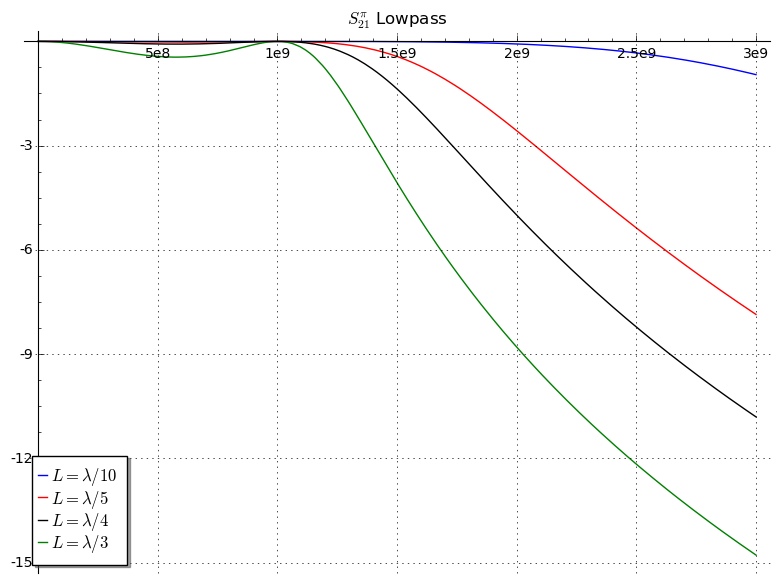

In [123]:
var('f')
f0 = 1e9; # Hz
c0 = 299792458; # m/s
lambda_ = c0 / f0; # m
beta_ = 2*pi/lambda_;

fmin = 0; #Hz
fmax = 3e9; #Hz
S21_pi_LP_1 = plot(S21_pi_LP(omega_0 = 2*pi*f0, omega=2*pi*f, L=0.1*lambda_, beta=beta_), (f, fmin, fmax), color='blue', legend_label='$L=\lambda/10$')
S21_pi_LP_2 = plot(S21_pi_LP(omega_0 = 2*pi*f0, omega=2*pi*f, L=0.2*lambda_, beta=beta_), (f, fmin, fmax), color='red', legend_label='$L=\lambda/5$')
S21_pi_LP_3 = plot(S21_pi_LP(omega_0 = 2*pi*f0, omega=2*pi*f, L=0.25*lambda_, beta=beta_), (f, fmin, fmax), color='black', legend_label='$L=\lambda/4$')
S21_pi_LP_4 = plot(S21_pi_LP(omega_0 = 2*pi*f0, omega=2*pi*f, L=0.33*lambda_, beta=beta_), (f, fmin, fmax), color='green', legend_label='$L=\lambda/3$')


P = S21_pi_LP_1 + S21_pi_LP_2 + S21_pi_LP_3 + S21_pi_LP_4
show(P, gridlines='Minor', title='$S_{21}^{\pi}$ Lowpass', ticks=[5e8, 3], xmin = 0, xmax=fmax, ymin=-15, ymax=0)

Lowpass T-type

In [124]:
reset()
from sage.misc.latex import MathJax
mj = MathJax()
j=i

var('Z0', 'beta', 'L', 'omega_0', 'omega')

L_T_LP = (Z0*(1-cos(beta*L)))/(omega_0*sin(beta*L));
C_T_LP = sin(beta*L)/(Z0*omega_0);

ZL_T_LP = j*omega*L_T_LP;
ZC_T_LP = 1/(j*omega*C_T_LP);

ABCD_L1_T_LP = matrix([[1,ZL_T_LP],[0,1]])
ABCD_C_T_LP = matrix([[1,0],[1/ZC_T_LP,1]])
ABCD_L2_T_LP = matrix([[1,ZL_T_LP],[0,1]])

ABCD_T_LP = ABCD_L1_T_LP*ABCD_C_T_LP*ABCD_L2_T_LP;

#Conversion ABCD to S
A = ABCD_T_LP[0,0];
B = ABCD_T_LP[0,1];
C = ABCD_T_LP[1,0];
D = ABCD_T_LP[1,1];

#S11_T_LP = ((A + B/Z0 - C*Z0 - D)/(A + B/Z0 + C*Z0 + D)).simplify_full()
#S12_T_LP = (2*(A*D - B*C)/(A + B/Z0 + C*Z0 + D)).simplify_full()
S21_T_LP = (2/(A + B/Z0 + C*Z0 + D)).simplify_full()
#S22_T_LP = ((-A + B/Z0 - C*Z0 + D)/(A + B/Z0 + C*Z0 + D)).simplify_full()

S21_T_LP(omega_0, omega, beta, L) = 10*log(abs(S21_T_LP), 10).simplify_full();

html('$A^{\pi}_{LP}$ = ' + mj(ABCD_T_LP) + mj(S21_T_LP))

<script type="math/tex">A^{\pi}_{LP}</script> = <html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}\left(\begin{array}{rr}
\frac{\omega^{2} {\left(\cos\left(L \beta\right) - 1\right)}}{\omega_{0}^{2}} + 1 & -\frac{i \, Z_{0} \omega {\left(\frac{\omega^{2} {\left(\cos\left(L \beta\right) - 1\right)}}{\omega_{0}^{2}} + 1\right)} {\left(\cos\left(L \beta\right) - 1\right)}}{\omega_{0} \sin\left(L \beta\right)} - \frac{i \, Z_{0} \omega {\left(\cos\left(L \beta\right) - 1\right)}}{\omega_{0} \sin\left(L \beta\right)} \\
\frac{i \, \omega \sin\left(L \beta\right)}{Z_{0} \omega_{0}} & \frac{\omega^{2} {\left(\cos\left(L \beta\right) - 1\right)}}{\omega_{0}^{2}} + 1
\end{array}\right)</script></html><html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}\left( \omega_{0}, \omega, \beta, L \right) \ {\mapsto} \ \frac{10 \, \log\left(\frac{2 \, {\left| \omega_{0} \right|}^{3} {\left| \sin\left(L \beta\right) \right|}}{{\left| 2 \, \omega^{2} \omega_{0} {\left(\cos\left(L \beta\right) - 1\right)} \sin\left(L \beta\right) + {\left(i \, \sin\left(L \beta\right)^{2} + 2 i \, \cos\left(L \beta\right) - 2 i\right)} \omega^{3} + {\left(i \, \sin\left(L \beta\right)^{2} - 2 i \, \cos\left(L \beta\right) + 2 i\right)} \omega \omega_{0}^{2} + 2 \, \omega_{0}^{3} \sin\left(L \beta\right) \right|}}\right)}{\log\left(10\right)}</script></html>

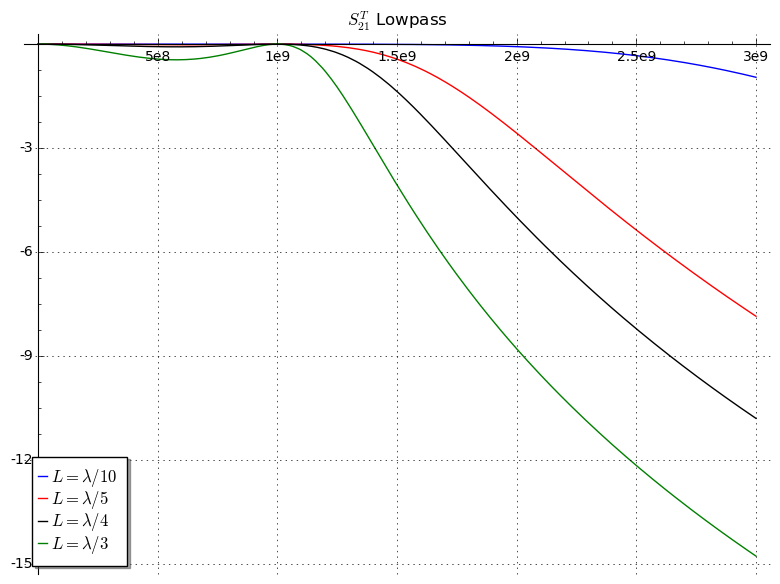

In [125]:
var('f')
f0 = 1e9; # Hz
c0 = 299792458; # m/s
lambda_ = c0 / f0; # m
beta_ = 2*pi/lambda_;

fmin = 0; #Hz
fmax = 3e9; #Hz
S21_T_LP_1 = plot(S21_T_LP(omega_0 = 2*pi*f0, omega=2*pi*f, L=0.1*lambda_, beta=beta_), (f, fmin, fmax), color='blue', legend_label='$L=\lambda/10$')
S21_T_LP_2 = plot(S21_T_LP(omega_0 = 2*pi*f0, omega=2*pi*f, L=0.2*lambda_, beta=beta_), (f, fmin, fmax), color='red', legend_label='$L=\lambda/5$')
S21_T_LP_3 = plot(S21_T_LP(omega_0 = 2*pi*f0, omega=2*pi*f, L=0.25*lambda_, beta=beta_), (f, fmin, fmax), color='black', legend_label='$L=\lambda/4$')
S21_T_LP_4 = plot(S21_T_LP(omega_0 = 2*pi*f0, omega=2*pi*f, L=0.33*lambda_, beta=beta_), (f, fmin, fmax), color='green', legend_label='$L=\lambda/3$')


P = S21_T_LP_1 + S21_T_LP_2 + S21_T_LP_3 + S21_T_LP_4
show(P, gridlines='Minor', title='$S_{21}^{T}$ Lowpass', ticks=[5e8, 3], xmin = 0, xmax=fmax, ymin=-15, ymax=0)

Highpass $\pi$-type

In [126]:
reset()
from sage.misc.latex import MathJax
mj = MathJax()
j=i

var('Z0', 'beta', 'L', 'omega_0', 'omega')

C_pi_HP = -1/(omega_0*Z0*sin(beta*L));
L_pi_HP = Z0*sin(beta*L)/(omega_0*(cos(beta*L)-1));


ZL_pi_HP = j*omega*L_pi_HP;
ZC_pi_HP = 1/(j*omega*C_pi_HP);


ABCD_L1_pi_HP = matrix([[1,0],[1/ZL_pi_HP,1]])
ABCD_C_pi_HP = matrix([[1,ZC_pi_HP],[0,1]])
ABCD_L2_pi_HP = matrix([[1,0],[1/ZL_pi_HP,1]])

ABCD_pi_HP = ABCD_L1_pi_HP*ABCD_C_pi_HP*ABCD_L2_pi_HP;
html('$A_{\pi}$ = ' + mj(ABCD_pi_HP))

#Conversion ABCD to S
A = ABCD_pi_HP[0,0];
B = ABCD_pi_HP[0,1];
C = ABCD_pi_HP[1,0];
D = ABCD_pi_HP[1,1];

#S11_pi_LP = ((A + B/Z0 - C*Z0 - D)/(A + B/Z0 + C*Z0 + D)).simplify_full()
#S12_pi_LP = (2*(A*D - B*C)/(A + B/Z0 + C*Z0 + D)).simplify_full()
S21_pi_HP = (2/(A + B/Z0 + C*Z0 + D)).simplify_full()
#S22_pi_LP = ((-A + B/Z0 - C*Z0 + D)/(A + B/Z0 + C*Z0 + D)).simplify_full()

S21_pi_HP(omega_0, omega, beta, L, Z0) = 10*log(abs(S21_pi_HP), 10).simplify_full();

html('$A^{\pi}_{HP}$ = ' + mj(ABCD_pi_HP) + mj(S21_pi_HP))


<script type="math/tex">A^{\pi}_{HP}</script> = <html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}\left(\begin{array}{rr}
\frac{\omega_{0}^{2} {\left(\cos\left(L \beta\right) - 1\right)}}{\omega^{2}} + 1 & \frac{i \, Z_{0} \omega_{0} \sin\left(L \beta\right)}{\omega} \\
-\frac{i \, \omega_{0} {\left(\frac{\omega_{0}^{2} {\left(\cos\left(L \beta\right) - 1\right)}}{\omega^{2}} + 1\right)} {\left(\cos\left(L \beta\right) - 1\right)}}{Z_{0} \omega \sin\left(L \beta\right)} - \frac{i \, \omega_{0} {\left(\cos\left(L \beta\right) - 1\right)}}{Z_{0} \omega \sin\left(L \beta\right)} & \frac{\omega_{0}^{2} {\left(\cos\left(L \beta\right) - 1\right)}}{\omega^{2}} + 1
\end{array}\right)</script></html><html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}\left( \omega_{0}, \omega, \beta, L, Z_{0} \right) \ {\mapsto} \ \frac{10 \, \log\left(\frac{2 \, {\left| \omega \right|}^{3} {\left| \sin\left(L \beta\right) \right|}}{{\left| 2 \, \omega \omega_{0}^{2} {\left(\cos\left(L \beta\right) - 1\right)} \sin\left(L \beta\right) + {\left(i \, \sin\left(L \beta\right)^{2} - 2 i \, \cos\left(L \beta\right) + 2 i\right)} \omega^{2} \omega_{0} + {\left(i \, \sin\left(L \beta\right)^{2} + 2 i \, \cos\left(L \beta\right) - 2 i\right)} \omega_{0}^{3} + 2 \, \omega^{3} \sin\left(L \beta\right) \right|}}\right)}{\log\left(10\right)}</script></html>

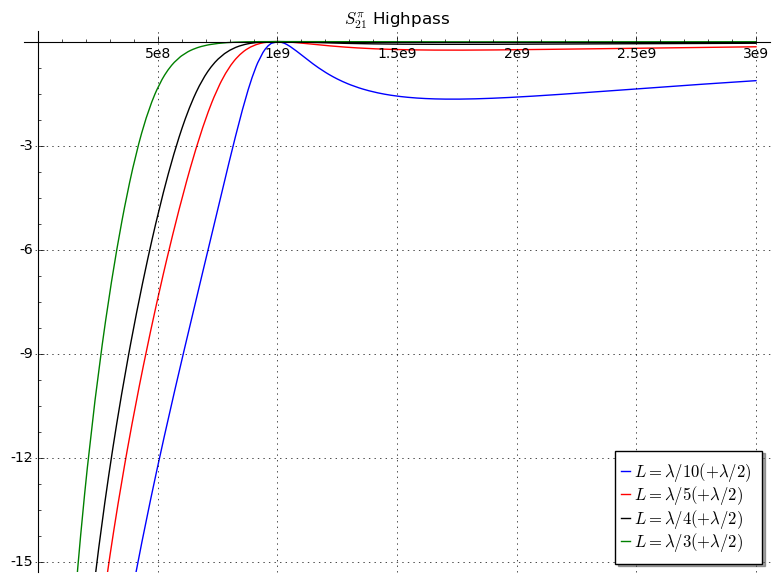

In [127]:
var('f')
f0 = 1e9; # Hz
c0 = 299792458; # m/s
lambda_ = c0 / f0; # m
beta_ = 2*pi/lambda_;

fmin = 0; #Hz
fmax = 3e9; #Hz
S21_pi_HP_1 = plot(S21_pi_HP(omega_0 = 2*pi*f0, omega=2*pi*f, L=(0.1+0.5)*lambda_, beta=beta_), (f, fmin, fmax), color='blue', legend_label='$L=\lambda/10 (+\lambda/2)$')
S21_pi_HP_2 = plot(S21_pi_HP(omega_0 = 2*pi*f0, omega=2*pi*f, L=(0.2+0.5)*lambda_, beta=beta_), (f, fmin, fmax), color='red', legend_label='$L=\lambda/5 (+\lambda/2)$')
S21_pi_HP_3 = plot(S21_pi_HP(omega_0 = 2*pi*f0, omega=2*pi*f, L=(0.25+0.5)*lambda_, beta=beta_), (f, fmin, fmax), color='black', legend_label='$L=\lambda/4 (+\lambda/2)$')
S21_pi_HP_4 = plot(S21_pi_HP(omega_0 = 2*pi*f0, omega=2*pi*f, L=(0.33+0.5)*lambda_, beta=beta_), (f, fmin, fmax), color='green', legend_label='$L=\lambda/3 (+\lambda/2)$')


P = S21_pi_HP_1 + S21_pi_HP_2 + S21_pi_HP_3 + S21_pi_HP_4
show(P, gridlines='Minor', title='$S_{21}^{\pi}$ Highpass', ticks=[5e8, 3], xmin = 0, xmax=fmax, ymin=-15, ymax=0)

Highpass T-type

In [128]:
reset()
from sage.misc.latex import MathJax
mj = MathJax()
j=i

var('Z0', 'beta', 'L', 'omega_0', 'omega')

C_T_HP = -(sin(beta*L))/(Z0*omega_0*(cos(beta*L)-1));
L_T_HP = Z0/(omega_0*sin(beta*L));


ZL_T_HP = j*omega*L_T_HP;
ZC_T_HP = 1/(j*omega*C_T_HP);


ABCD_C1_T_HP = matrix([[1,ZC_T_HP],[0,1]])
ABCD_L_T_HP = matrix([[1,0],[1/ZL_T_HP,1]])
ABCD_C2_T_HP = matrix([[1,ZC_T_HP],[0,1]])

ABCD_T_HP = ABCD_C1_T_HP*ABCD_L_T_HP*ABCD_C2_T_HP;
html('$A_{\pi}$ = ' + mj(ABCD_T_HP))

#Conversion ABCD to S
A = ABCD_T_HP[0,0];
B = ABCD_T_HP[0,1];
C = ABCD_T_HP[1,0];
D = ABCD_T_HP[1,1];

#S11_T_LP = ((A + B/Z0 - C*Z0 - D)/(A + B/Z0 + C*Z0 + D)).simplify_full()
#S12_T_LP = (2*(A*D - B*C)/(A + B/Z0 + C*Z0 + D)).simplify_full()
S21_T_HP = (2/(A + B/Z0 + C*Z0 + D)).simplify_full()
#S22_T_LP = ((-A + B/Z0 - C*Z0 + D)/(A + B/Z0 + C*Z0 + D)).simplify_full()

S21_T_HP(omega_0, omega, beta, L, Z0) = 10*log(abs(S21_T_HP), 10).simplify_full();

html('$A^{\pi}_{HP}$ = ' + mj(ABCD_T_HP) + mj(S21_T_HP))

<script type="math/tex">A^{\pi}_{HP}</script> = <html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}\left(\begin{array}{rr}
\frac{\omega_{0}^{2} {\left(\cos\left(L \beta\right) - 1\right)}}{\omega^{2}} + 1 & \frac{i \, Z_{0} \omega_{0} {\left(\frac{\omega_{0}^{2} {\left(\cos\left(L \beta\right) - 1\right)}}{\omega^{2}} + 1\right)} {\left(\cos\left(L \beta\right) - 1\right)}}{\omega \sin\left(L \beta\right)} + \frac{i \, Z_{0} \omega_{0} {\left(\cos\left(L \beta\right) - 1\right)}}{\omega \sin\left(L \beta\right)} \\
-\frac{i \, \omega_{0} \sin\left(L \beta\right)}{Z_{0} \omega} & \frac{\omega_{0}^{2} {\left(\cos\left(L \beta\right) - 1\right)}}{\omega^{2}} + 1
\end{array}\right)</script></html><html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}\left( \omega_{0}, \omega, \beta, L, Z_{0} \right) \ {\mapsto} \ \frac{10 \, \log\left(\frac{2 \, {\left| \omega \right|}^{3} {\left| \sin\left(L \beta\right) \right|}}{{\left| 2 \, \omega \omega_{0}^{2} {\left(\cos\left(L \beta\right) - 1\right)} \sin\left(L \beta\right) + {\left(i \, \cos\left(L \beta\right)^{2} + 2 i \, \cos\left(L \beta\right) - 3 i\right)} \omega^{2} \omega_{0} + {\left(i \, \cos\left(L \beta\right)^{2} - 2 i \, \cos\left(L \beta\right) + i\right)} \omega_{0}^{3} + 2 \, \omega^{3} \sin\left(L \beta\right) \right|}}\right)}{\log\left(10\right)}</script></html>

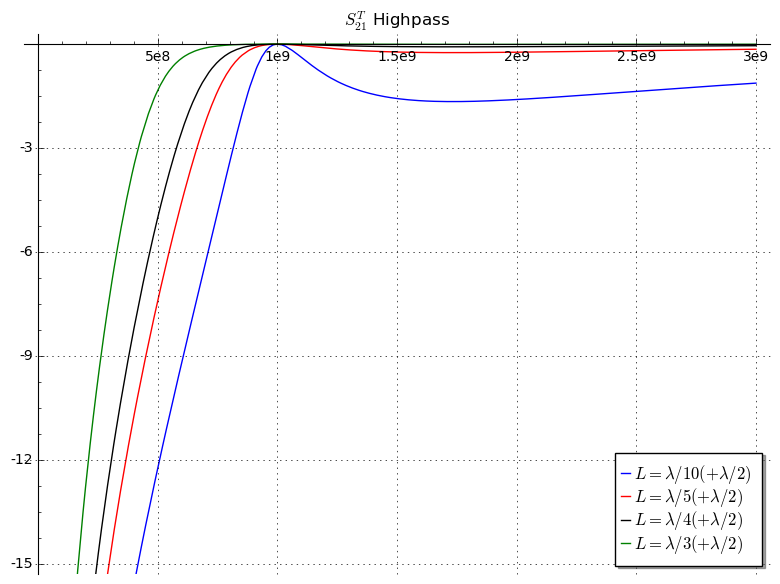

In [129]:
var('f')
f0 = 1e9; # Hz
c0 = 299792458; # m/s
lambda_ = c0 / f0; # m
beta_ = 2*pi/lambda_;

fmin = 0; #Hz
fmax = 3e9; #Hz
S21_T_HP_1 = plot(S21_T_HP(omega_0 = 2*pi*f0, omega=2*pi*f, L=(0.1+0.5)*lambda_, beta=beta_), (f, fmin, fmax), color='blue', legend_label='$L=\lambda/10 (+\lambda/2)$')
S21_T_HP_2 = plot(S21_T_HP(omega_0 = 2*pi*f0, omega=2*pi*f, L=(0.2+0.5)*lambda_, beta=beta_), (f, fmin, fmax), color='red', legend_label='$L=\lambda/5 (+\lambda/2)$')
S21_T_HP_3 = plot(S21_T_HP(omega_0 = 2*pi*f0, omega=2*pi*f, L=(0.25+0.5)*lambda_, beta=beta_), (f, fmin, fmax), color='black', legend_label='$L=\lambda/4 (+\lambda/2)$')
S21_T_HP_4 = plot(S21_T_HP(omega_0 = 2*pi*f0, omega=2*pi*f, L=(0.33+0.5)*lambda_, beta=beta_), (f, fmin, fmax), color='green', legend_label='$L=\lambda/3 (+\lambda/2)$')


P = S21_T_HP_1 + S21_T_HP_2 + S21_T_HP_3 + S21_T_HP_4
show(P, gridlines='Minor', title='$S_{21}^{T}$ Highpass', ticks=[5e8, 3], xmin = 0, xmax=fmax, ymin=-15, ymax=0)